Regressão Linear

Aula pratica de regressao linear. O objetivo é prever o custo da diaria de um imovel baseado ao numero de pessoas

In [18]:
# importando as bibliotecas necessarias para o projeto
import pandas as pd
import plotly.express as px #criacao de graficos dinamicos
import seaborn as sns #biblioteca para graficos
import numpy as np #funcoes matematicas de alto nivel
from sklearn.linear_model import LinearRegression

abrindo o arquivo contendo os dados utilizados na regressao

In [4]:
# File location
file_location = "D://caiof//Documents//GIT_Repos//Arquiteto_BigData-IGTI//Bases_Dados//datasets//base_custo_diaria.csv"

In [6]:
base_custo_diaria = pd.read_csv(file_location,sep= ';')

In [7]:
#visualizando os dados da base
base_custo_diaria.head()

,qtd_pessoas,valor_diaria
0,1,150
1,4,385
2,6,499
3,10,680
4,13,735


In [8]:
#estatisticas da base de dados
base_custo_diaria.describe()

,qtd_pessoas,valor_diaria
count,15.000000,15.000000
mean,24.533333,1348.600000
std,16.796542,823.087116
min,1.000000,150.000000
25%,11.500000,707.500000
50%,22.000000,1075.000000
75%,41.000000,2044.500000
max,50.000000,2680.000000


Criando as variaveis que serão utilizadas no modelo

In [9]:
# criando variavel independente
x_custo_diario = base_custo_diaria.iloc[:,0].values #buscando registros da primeira coluna e convertendo em array
"""
o comando iloc permite selecionar um conjunto de registros.
os dois pontos ":" significa que estamos selecionando todos os registros e zero "0" a primeira coluna.
"""
x_custo_diario

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50],
      dtype=int64)

In [10]:
#criando variavel dependente (o que queremos predizer)
y_custo_diaria = base_custo_diaria.iloc[:,1].values
y_custo_diaria

array([ 150,  385,  499,  680,  735,  859,  989, 1075, 1500, 1850, 2000,
       2089, 2250, 2488, 2680], dtype=int64)

In [11]:
np.corrcoef(x_custo_diario,y_custo_diaria) #mostra uma matriz


array([[1.        , 0.99206905],
       [0.99206905, 1.        ]])

Correlação 

* Correlação Positiva: quando duas variaveis que possuem correlaçao crescem ou descrescem juntas, ou seja, que possuem uma relação direta.
* Correlação Negativa: quando duas variaveis que possuem correlação mas quando uma variavel cresce a outa decresce ou vice-versa
* Não ter correlação: quando o crescimento ou descrescimento de uma variavel não tem efeito sobre a outra variavel

<Axes: >

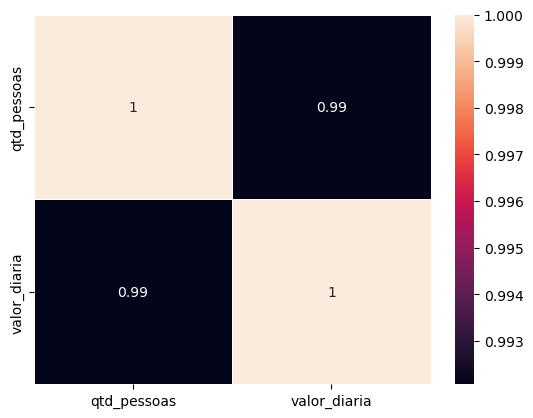

In [13]:
correlation = base_custo_diaria.corr()
#exibicao da matriz de correlacao
plot = sns.heatmap(correlation , annot=True, linewidths= .4)
plot

Perceba que temos uma correlação forte positiva. Pois a medida que a quantidade de pessoas aumenta o preço da diaria tambem aumenta.
Alem disso, podemos dizer que em 99% do valor cobrado pelas diarias pode ser explicado pela quantidade de pessoas alugando o imovel.

Tratando os dados para o modelo

 Nesse passo vamos realizar transformações nos dados. essa transformação deve ser feita para que os dados possam ter o formato que o algoritmo solicita como entrada

In [14]:
#visualizando o formato da variavel 
x_custo_diario.shape

(15,)

In [15]:
#visualizando variavel
"""
o resultado mostra que temos um array com apenas uma coluna/dimensao.
No entanto, precisamos ter uma matriz com 2 colunas 
"""
x_custo_diario 

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50],
      dtype=int64)

In [16]:
x_custo_diario = x_custo_diario.reshape(-1,1)
x_custo_diario

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30],
       [40],
       [42],
       [45],
       [47],
       [50]], dtype=int64)

In [17]:
#agora temos uma matriz com duas colunas. 10 linhas e uma coluna
x_custo_diario.shape

(15, 1)

Aplicando os dados ao algoritmo de regressão

In [19]:
#criando um objeto do tipo regressao linear
previsao_custo_diario = LinearRegression()

In [20]:
type(previsao_custo_diario)

sklearn.linear_model._base.LinearRegression

Realizando o treinamento do modelo

In [21]:
previsao_custo_diario.fit(x_custo_diario,y_custo_diaria)

LinearRegression()

In [22]:
#verificando a interceptacao
previsao_custo_diario.intercept_

155.9187455693202

In [23]:
previsao_custo_diario.coef_

array([48.61472504])

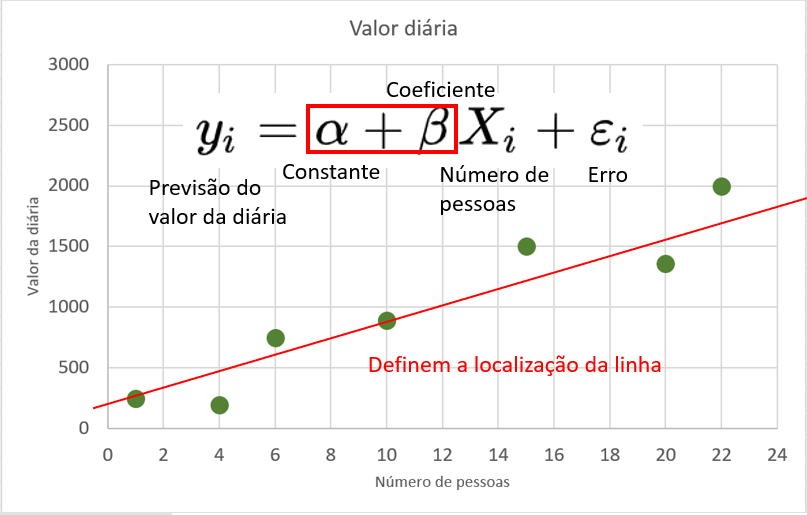


In [24]:
#baseado nos valores de nº de pessoas, vamos estimar/prever o custo do imovel alugado
previsao_precos = previsao_custo_diario.predict(x_custo_diario)

In [25]:
#visualiza as previsões para cada nº de pessoas
previsao_precos

array([ 204.53347061,  350.37764575,  447.60709584,  642.06599602,
        787.91017115,  885.13962124, 1030.98379637, 1225.44269655,
       1371.28687169, 1614.36049691, 2100.50774736, 2197.73719745,
       2343.58137258, 2440.81082267, 2586.65499781])

Visualizando no grafico as disposições dos dados

In [26]:
#verificando tipo da variavel x_custo_diario
x_custo_diario

array([[ 1],
       [ 4],
       [ 6],
       [10],
       [13],
       [15],
       [18],
       [22],
       [25],
       [30],
       [40],
       [42],
       [45],
       [47],
       [50]], dtype=int64)

In [27]:
#transformando em vetor
x_custo_diario.ravel()

array([ 1,  4,  6, 10, 13, 15, 18, 22, 25, 30, 40, 42, 45, 47, 50],
      dtype=int64)

In [28]:
grafico = px.scatter(x = x_custo_diario.ravel(), y = y_custo_diaria)
grafico.add_scatter(x = x_custo_diario.ravel(), y = previsao_precos, name= 'previsões')
grafico.show()

PAREI O VIDEO EM 19:26